In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("ncr_ride_bookings.csv")

In [3]:
df.head(3)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [5]:
df.shape

(150000, 21)

In [6]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [7]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [8]:
missing_data = df.isnull().mean()

missing_data[missing_data>0].sort_values(ascending=False)

Incomplete Rides                     0.94
Incomplete Rides Reason              0.94
Cancelled Rides by Customer          0.93
Reason for cancelling by Customer    0.93
Cancelled Rides by Driver            0.82
Driver Cancellation Reason           0.82
Driver Ratings                       0.38
Customer Rating                      0.38
Avg CTAT                             0.32
Ride Distance                        0.32
Booking Value                        0.32
Payment Method                       0.32
Avg VTAT                             0.07
dtype: float64

In [9]:

df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [10]:
print((df["Booking Status"].unique()))
print(df["Booking Status"].value_counts())


['No Driver Found' 'Incomplete' 'Completed' 'Cancelled by Driver'
 'Cancelled by Customer']
Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64


In [11]:
df.select_dtypes(include='number').columns

Index(['Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer',
       'Cancelled Rides by Driver', 'Incomplete Rides', 'Booking Value',
       'Ride Distance', 'Driver Ratings', 'Customer Rating'],
      dtype='object')

In [12]:
def clean_ready_dataset(df):
    df_clean = df.copy()
    df_clean["Date"] = pd.to_datetime(df_clean["Date"])
    df_clean["DateTime"] = pd.to_datetime(df_clean["Date"].astype(str) + ' ' + df_clean["Time"].astype(str))
    df_clean["Hours"] = df_clean["DateTime"].dt.hour
    df_clean["Day"] = df_clean["DateTime"].dt.day_name()
    df_clean["Month"] = df_clean["DateTime"].dt.month
    df_clean["Weekend"] = df_clean["DateTime"].dt.weekday >= 5
    
    numeric_cols = ['Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']
    for numeric in numeric_cols:
        df_clean[numeric] = pd.to_numeric(df_clean[numeric],errors="coerce")
    
    df_clean["Successful"] = df_clean["Booking Status"] == "Completed"
    df_clean["Cancelled_Customer"] = df_clean["Cancelled Rides by Customer"].notna()
    df_clean["Cancelled_Driver"] = df_clean["Cancelled Rides by Driver"].notna()
    
    def categorize_status(status):
        if status == 'Completed':
            return 'Completed'
        elif 'Cancelled' in str(status):
            return 'Cancelled'
        elif status == 'No Driver Found':
            return 'No Driver Found'
        else:
            return 'Other'
        
    df_clean["Status Category"] = df_clean["Booking Status"].apply(categorize_status)
    
    return df_clean
df = clean_ready_dataset(df)


In [13]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Payment Method,DateTime,Hours,Day,Month,Weekend,Successful,Cancelled_Customer,Cancelled_Driver,Status Category
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,2024-03-23 12:29:38,12,Saturday,3,True,False,False,False,No Driver Found
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,UPI,2024-11-29 18:01:39,18,Friday,11,False,False,False,False,Other
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,Debit Card,2024-08-23 08:56:10,8,Friday,8,False,True,False,False,Completed
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,UPI,2024-10-21 17:17:25,17,Monday,10,False,True,False,False,Completed
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,UPI,2024-09-16 22:08:00,22,Monday,9,False,True,False,False,Completed


In [14]:
def create_executive_summary(df):
    """Generate key business metrics"""
    
    total_rides = len(df)
    successful_rides = df['Successful'].sum()
    success_rate = (successful_rides / total_rides) * 100
    
    total_revenue = df[df['Successful']]['Booking Value'].sum()
    avg_ride_value = df[df['Successful']]['Booking Value'].mean()
    
    avg_distance = df[df['Successful']]['Ride Distance'].mean()
    avg_driver_rating = df[df['Successful']]['Driver Ratings'].mean()
    avg_customer_rating = df[df['Successful']]['Customer Rating'].mean()
    
    # Cancellation analysis
    customer_cancellations = df['Cancelled_Customer'].sum()
    driver_cancellations = df['Cancelled_Driver'].sum()
    
    return {
        'total_rides': total_rides,
        'successful_rides': successful_rides,
        'success_rate': success_rate,
        'total_revenue': total_revenue,
        'avg_ride_value': avg_ride_value,
        'avg_distance': avg_distance,
        'avg_driver_rating': avg_driver_rating,
        'avg_customer_rating': avg_customer_rating,
        'customer_cancellations': customer_cancellations,
        'driver_cancellations': driver_cancellations
    }

# Get our key metrics
metrics = create_executive_summary(df)

print("🎯 EXECUTIVE SUMMARY")
print("=" * 50)
print(f"📊 Total Rides Analyzed: {metrics['total_rides']:,}")
print(f"✅ Successful Rides: {metrics['successful_rides']:,}")
print(f"📈 Success Rate: {metrics['success_rate']:.1f}%")
print(f"💰 Total Revenue: ₹{metrics['total_revenue']:,.0f}")
print(f"💵 Average Ride Value: ₹{metrics['avg_ride_value']:.0f}")
print(f"🛣️ Average Distance: {metrics['avg_distance']:.1f} km")
print(f"⭐ Avg Driver Rating: {metrics['avg_driver_rating']:.2f}/5")
print(f"⭐ Avg Customer Rating: {metrics['avg_customer_rating']:.2f}/5")
print(f"❌ Customer Cancellations: {metrics['customer_cancellations']:,}")
print(f"🚫 Driver Cancellations: {metrics['driver_cancellations']:,}")

🎯 EXECUTIVE SUMMARY
📊 Total Rides Analyzed: 150,000
✅ Successful Rides: 93,000
📈 Success Rate: 62.0%
💰 Total Revenue: ₹47,260,574
💵 Average Ride Value: ₹508
🛣️ Average Distance: 26.0 km
⭐ Avg Driver Rating: 4.23/5
⭐ Avg Customer Rating: 4.40/5
❌ Customer Cancellations: 10,500
🚫 Driver Cancellations: 27,000


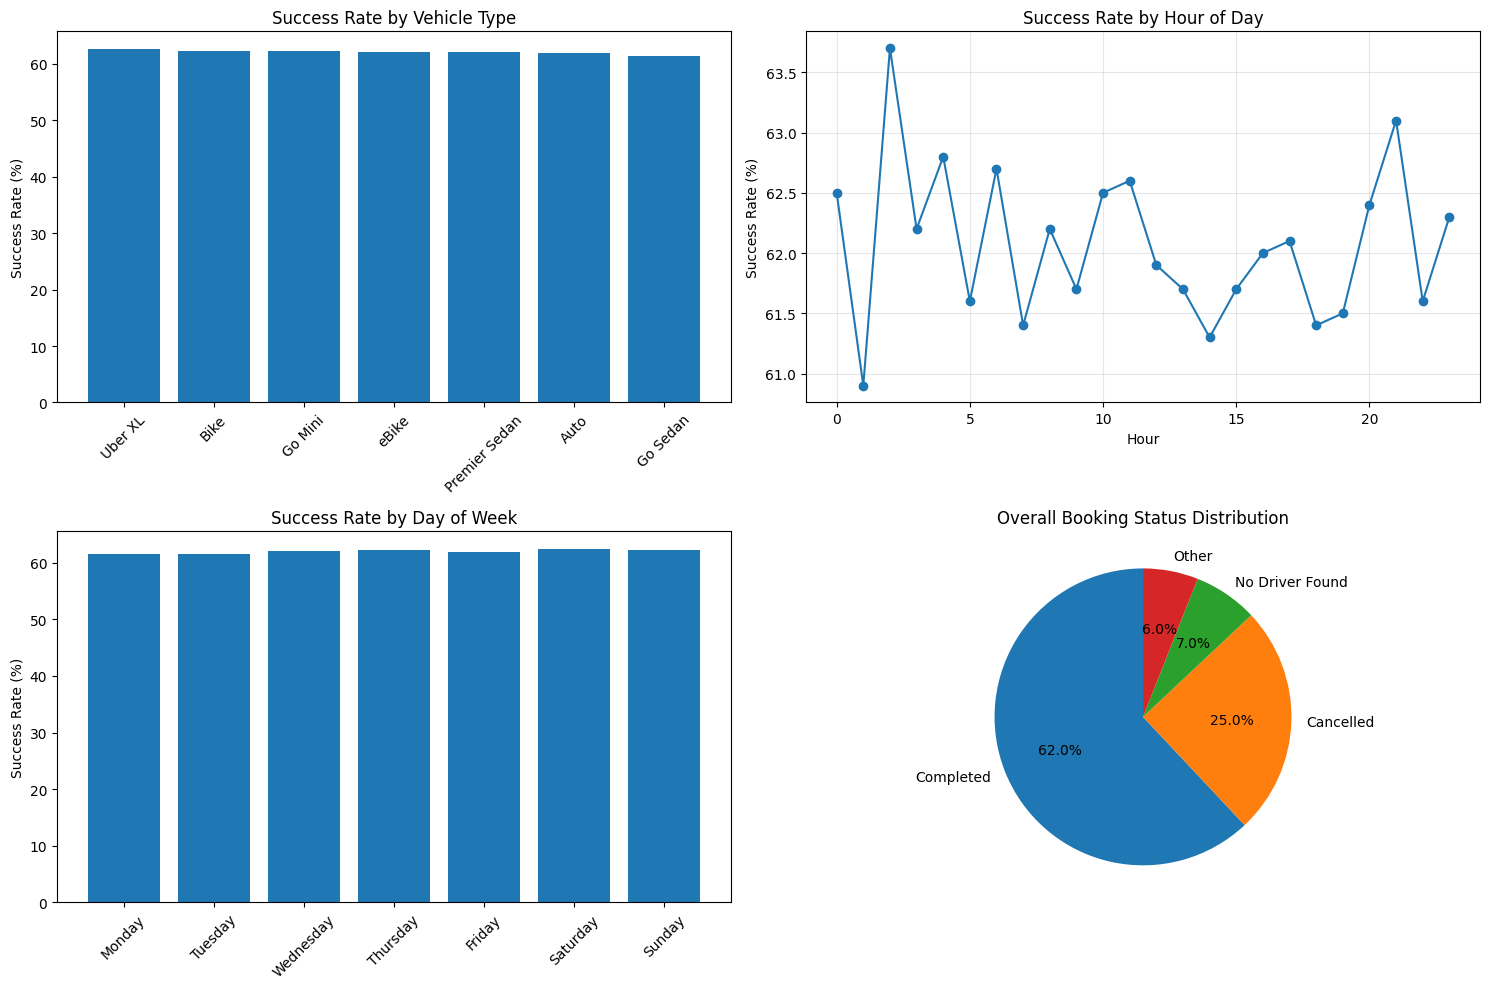

🏆 TOP PERFORMING VEHICLE TYPES:
               Total_Rides  Successful_Rides  Success_Rate
Vehicle_Type                                              
Uber XL               4449              2783         0.626
Bike                 22517             14034         0.623
Go Mini              29806             18549         0.622
eBike                10557              6551         0.621
Premier Sedan        18111             11252         0.621


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Standardize column names
# -----------------------------
df.columns = (
    df.columns
      .str.strip()
      .str.replace(' ', '_')
      .str.replace('-', '_')
)

# -----------------------------
# Create Success column
# -----------------------------
df['Successful'] = df['Booking_Status'] == 'Completed'

# -----------------------------
# Create subplots
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# ==================================================
# 1. Success rate by vehicle type
# ==================================================
vehicle_success = df.groupby('Vehicle_Type').agg(
    Total_Rides=('Successful', 'count'),
    Successful_Rides=('Successful', 'sum'),
    Success_Rate=('Successful', 'mean')
).round(3)

vehicle_success = vehicle_success.sort_values('Success_Rate', ascending=False)

axes[0, 0].bar(vehicle_success.index, vehicle_success['Success_Rate'] * 100)
axes[0, 0].set_title('Success Rate by Vehicle Type')
axes[0, 0].set_ylabel('Success Rate (%)')
axes[0, 0].tick_params(axis='x', rotation=45)

# ==================================================
# 2. Success rate by hour of day
# ==================================================
hourly_success = df.groupby('Hours').agg(
    Total_Rides=('Successful', 'count'),
    Successful_Rides=('Successful', 'sum'),
    Success_Rate=('Successful', 'mean')
).round(3)

axes[0, 1].plot(
    hourly_success.index,
    hourly_success['Success_Rate'] * 100,
    marker='o'
)
axes[0, 1].set_title('Success Rate by Hour of Day')
axes[0, 1].set_xlabel('Hour')
axes[0, 1].set_ylabel('Success Rate (%)')
axes[0, 1].grid(True, alpha=0.3)

# ==================================================
# 3. Success rate by day of week
# ==================================================
daily_success = df.groupby('Day').agg(
    Total_Rides=('Successful', 'count'),
    Successful_Rides=('Successful', 'sum'),
    Success_Rate=('Successful', 'mean')
).round(3)

day_order = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]
daily_success = daily_success.reindex(day_order)

axes[1, 0].bar(daily_success.index, daily_success['Success_Rate'] * 100)
axes[1, 0].set_title('Success Rate by Day of Week')
axes[1, 0].set_ylabel('Success Rate (%)')
axes[1, 0].tick_params(axis='x', rotation=45)

# ==================================================
# 4. Booking status distribution
# ==================================================
status_counts = df['Status_Category'].value_counts()

axes[1, 1].pie(
    status_counts.values,
    labels=status_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
axes[1, 1].set_title('Overall Booking Status Distribution')

# -----------------------------
# Layout and display
# -----------------------------
plt.tight_layout()
plt.show()

# -----------------------------
# Top performing vehicle types
# -----------------------------
print("🏆 TOP PERFORMING VEHICLE TYPES:")
print(vehicle_success.head())


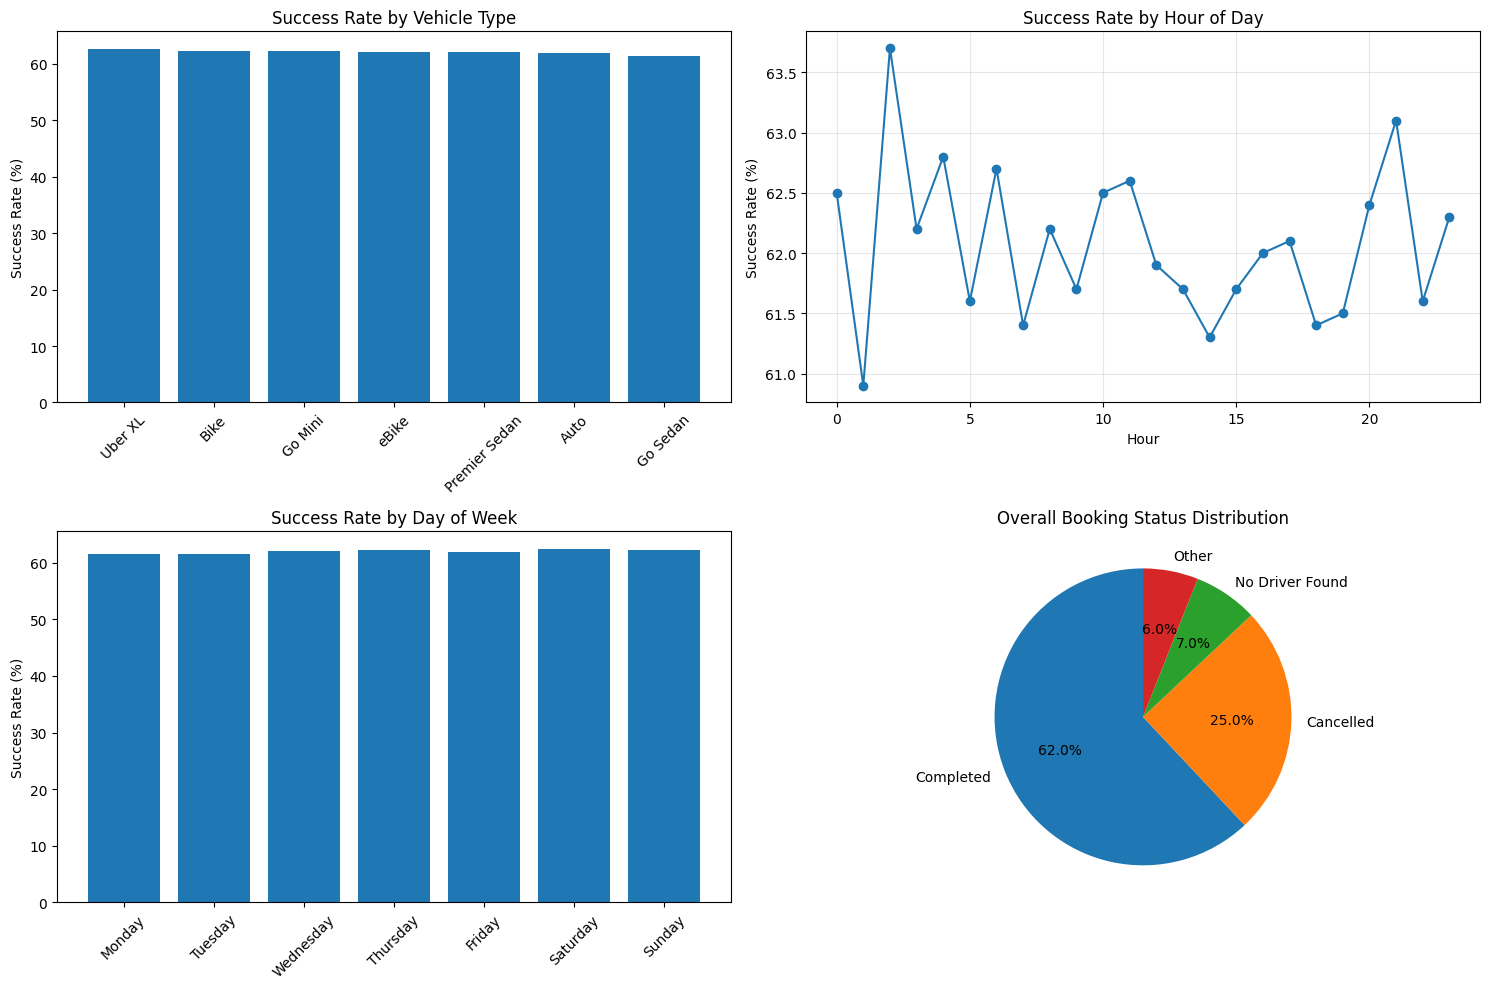

🏆 TOP PERFORMING VEHICLE TYPES:
               Total_Rides  Successful_Rides  Success_Rate
Vehicle_Type                                              
Uber XL               4449              2783         0.626
Bike                 22517             14034         0.623
Go Mini              29806             18549         0.622
eBike                10557              6551         0.621
Premier Sedan        18111             11252         0.621


In [16]:
import pandas as pd
import matplotlib.pyplot as plt


df.columns = (
    df.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')
)


df['Successful'] = df['Booking_Status'] == 'Completed'


fig, axes = plt.subplots(2, 2, figsize=(15, 10))

vehicle_success = df.groupby('Vehicle_Type').agg(
    Total_Rides=('Successful', 'count'),
    Successful_Rides=('Successful', 'sum'),
    Success_Rate=('Successful', 'mean')
).round(3)

vehicle_success = vehicle_success.sort_values('Success_Rate', ascending=False)

axes[0, 0].bar(vehicle_success.index, vehicle_success['Success_Rate'] * 100)
axes[0, 0].set_title('Success Rate by Vehicle Type')
axes[0, 0].set_ylabel('Success Rate (%)')
axes[0, 0].tick_params(axis='x', rotation=45)


hourly_success = df.groupby('Hours').agg(
    Total_Rides=('Successful', 'count'),
    Successful_Rides=('Successful', 'sum'),
    Success_Rate=('Successful', 'mean')
).round(3)

axes[0, 1].plot(
    hourly_success.index,
    hourly_success['Success_Rate'] * 100,
    marker='o'
)
axes[0, 1].set_title('Success Rate by Hour of Day')
axes[0, 1].set_xlabel('Hour')
axes[0, 1].set_ylabel('Success Rate (%)')
axes[0, 1].grid(True, alpha=0.3)


daily_success = df.groupby('Day').agg(
    Total_Rides=('Successful', 'count'),
    Successful_Rides=('Successful', 'sum'),
    Success_Rate=('Successful', 'mean')
).round(3)

day_order = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]
daily_success = daily_success.reindex(day_order)

axes[1, 0].bar(daily_success.index, daily_success['Success_Rate'] * 100)
axes[1, 0].set_title('Success Rate by Day of Week')
axes[1, 0].set_ylabel('Success Rate (%)')
axes[1, 0].tick_params(axis='x', rotation=45)


status_counts = df['Status_Category'].value_counts()

axes[1, 1].pie(
    status_counts.values,
    labels=status_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
axes[1, 1].set_title('Overall Booking Status Distribution')


plt.tight_layout()
plt.show()


print("🏆 TOP PERFORMING VEHICLE TYPES:")
print(vehicle_success.head())


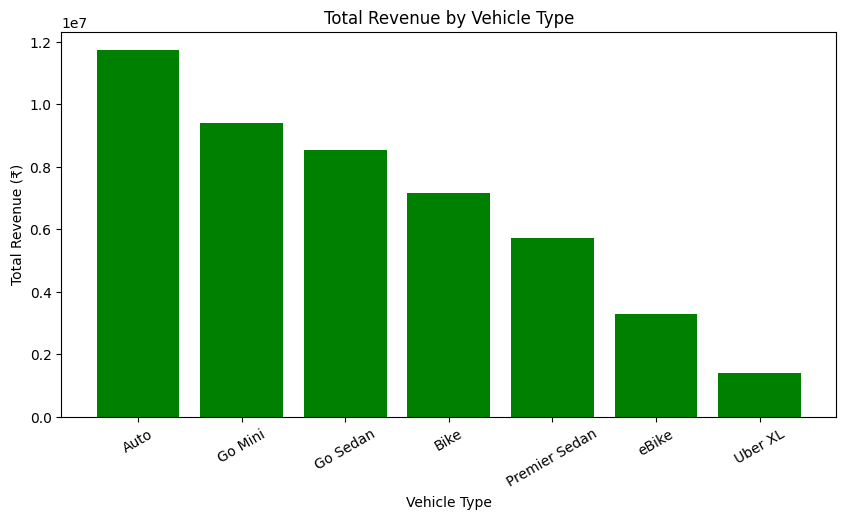

In [22]:
# Keep only successful rides
successful_rides = df[df['Successful'] == True]

# Total revenue by vehicle type
vehicle_revenue = successful_rides.groupby('Vehicle_Type')['Booking_Value'].sum()

# Sort by highest revenue
vehicle_revenue = vehicle_revenue.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
plt.bar(vehicle_revenue.index, vehicle_revenue.values, color='green')

plt.title("Total Revenue by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Total Revenue (₹)")
plt.xticks(rotation=30)

plt.show()
